<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мой проект заключается в том, что с помоющи python и библиотек, которые в нём есть возможно создание искуственных нейронных сетей.

Нейронные сети - оработчик информации, позволяющий размышлять нашему мозгу. Нейрон - компонента, из которого состот вся нервная система человека. Мы имеем способность, например, различать цифры из-за передаваемых сигналов в нашем теле.

Чтобы машин смогла делать примерно такие-же действия нужно создать интелект, построенной на математических алгоритмах. 

11501568/11490434 [==============================] - 0s 0us/step


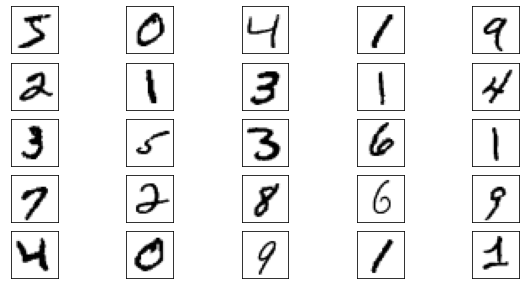

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # коллекция, содержащяя рукописные цифры
from tensorflow import keras                        # импорт керас
from tensorflow.keras.layers import Dense, Flatten  

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # обучающие и тестовые выборки

# стандартизация входных данных
x_train = x_train / 255  # значения теперь от 0 до 1. 255 - максимальное значение
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10) # преобразование данных в массив(смотрите текст ниже)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

KERAS – это высокоуровневые нейронные сети API. Он написан в Python и может работать на вершине Theano, Tensorflow или CNTK. Это было разработано с идеей: KERAS – это удобная, расширяемая и модульная библиотека, которая облегчает прототипирование легко и быстро.

*Какую структуру выбираем?* Воспользуемся полносязной нейронной сетью

В качестве *функции активации* для скрытого слоя используем **ReLu**

А для выходного слоя  **softmax**, потому, что softmax инторетирует значения в терминах вероятности

Всего пикселей в каждой картинке 784, мы будем *преобразовывать всё в вектор*, с помоющи команды **Flatten(input_shape=(28, 28, 1))**

ДЛя связки, берём функцию **Dense(128, activation = 'relu')**, где 128 - любое чило нейронов, а activation - активационная функция

Ещё, выходнлй слой содержит всего 10 нейронов потому, что выходные нейроны - это окончательные варианты в классификации. Тоесть, у нас распоснаются числа от 1 до 10






```
y_train_cat = keras.utils.to_categorical(y_train, 10) # преобразование данных в массив(смотрите текст ниже)
y_test_cat = keras.utils.to_categorical(y_test, 10)
```
Эти строчне в коде образуют массив, они дают, к примеру цифре 5 такое значение - [0,0,0,0,0,1,0,0,0,0,0,] 
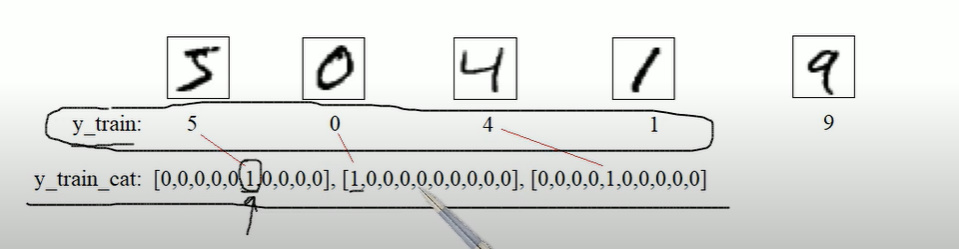

In [2]:
# создание модели
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),  # первый слой, 1 - 1 биас (градации серого)
    Dense(128, activation='relu'),  # скрытый слой, функция активации - relu
    Dense(10, activation='softmax') # выходной слой, функция активации - softmax
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Мы видим, что у входного слоя нет параметров ( Param - веса, которые формируются в процессе обучения).

Второй слой ( dense (Dense) ) имеет 100480 настраемых параметров. Число весовых коофицентов. (128+1(bias)) * 784

In [13]:
model.compile(optimizer='adam', # оптимизатор
             loss='categorical_crossentropy', # функция потерь
             metrics=['accuracy']) 

# всё, тренируем
fit = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2) # batch_size= после каждых 32 изображений, будем корректирывать весовые коофиценты


Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0863 - val_accuracy: 0.9750
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0845 - val_accuracy: 0.9756
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0907 - val_accuracy: 0.9743
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0884 - val_accuracy: 0.9767
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0930 - val_accuracy: 0.9753


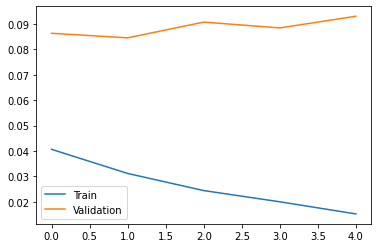

In [14]:
import matplotlib.pyplot as plt

plt.plot(fit.history['loss'], label = 'Train')
plt.plot(fit.history['val_loss'], label = 'Validation')
plt.legend()

Метрика - метод оценки алгоритма. мы используем accuracy . Это самая лёгкая метрика. Она просто выводит долю правильных ответов.
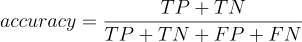

В итоге, мы имеем ошибки - 0.0944, и процент предсказания - 0.9704 ( ддостаточно высокий) это на тестовой выборке

In [4]:
# тестируем
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9760


[0.07853025943040848, 0.9760000109672546]

[[4.2879346e-08 1.8788271e-05 1.9525143e-05 7.1150053e-04 1.9119913e-04
  3.4334134e-05 4.2315612e-10 3.3357279e-05 9.4100864e-07 9.9899024e-01]]
Это цифра: 9


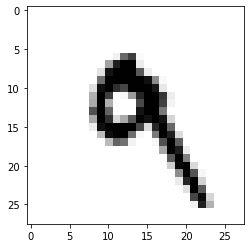

In [5]:
#Подадим на вход изображение
n = 7
x = np.expand_dims(x_test[n], axis=0) # трёхмерный тенсор
res = model.predict(x)
print( res )
print( 'Это цифра:', np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True  True  True]
(240, 28, 28)


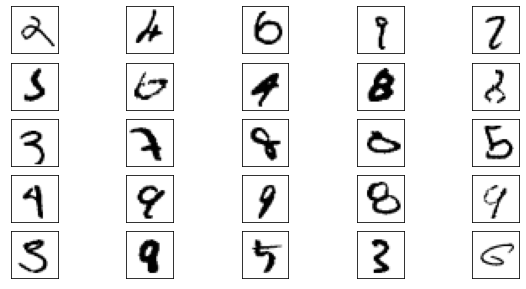

In [6]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()


In [7]:
# код, который делает магию и дает возможность рисовать в колабе
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="width: 160px; height: 160px"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = (e.pageX - this.offsetLeft)/10
  mouse.y = (e.pageY - this.offsetTop)/10
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=16, h=16, line_width=1):
    display(HTML(canvas_html % (w, h, line_width)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return len(binary)

In [8]:
# запустите эту ячейку, нарисуйте цифру.
# когда закончите, нажмите Finish

# рисовать нужно левее кнопки
draw(w=16, h=16, line_width=1)

289

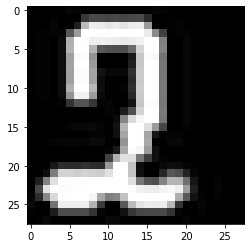

In [9]:
#поменяем размер изображения и сделаем его похожим на мнист

from PIL import Image

img = Image.open('drawing.png')

r = img.resize((28,28), Image.ANTIALIAS)
red, green, blue, alpha = r.split()
#1, 784
image_array = np.array(alpha).reshape((28, 28, 1))
plt.imshow(image_array.reshape([28,28]), cmap='gray')

In [10]:

print(np.sqrt(image_array.shape[1]))

5.291502622129181


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Это цифра: 3


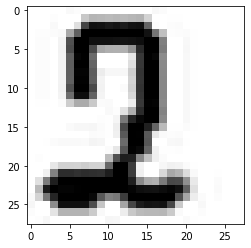

In [11]:
#Подадим на вход изображение
n = 1
x = np.expand_dims(image_array, axis=0) # трёхмерный тенсор
res = model.predict(x)
print( res )
print( 'Это цифра:', np.argmax(res) )

#plt.imshow(image_array.reshape([28,28]), cmap='gray')
plt.imshow(image_array.reshape([28,28]), cmap=plt.cm.binary)
plt.show()